# Wind Turbine Collective Blade Pitch Angle Control

#### Bradley Berning, Dalton Flynn, Alexander Smith, Matthew Zaccari
#### Professor Jeffrey Kantor
#### CBE 30338: Chemical Process Control
#### 4 May 2017

## I. Problem Statement

One common mode of power generation in the twenty-first century is use of a wind turbine that creates electrical power by harnessing naturally occurring wind. Stated simply, the turbine rotors turn a generator which produces power to be used by the grid.  The rate of this power generation depends on the generator speed which is in turn determined by wind speeds and how the turbine is operated. In this project, a PI control system was designed to maintain a generator at its rated speed, in region three, by altering the collective blade pitch angle in response to changing wind speeds. 

Wind turbine operation is separated into four regions depending on the wind speed experienced by the blades in order to ensure proper operation and longevity of the turbine.  In region one, the wind speed is too low and does not exert sufficient torque on the turbine blades, resulting in no rotation.  As a result, no electrical power is produced in region one.  Region two is characterized by wind at a speed above which the blades begin to rotate (called the cut-in speed) but below where maximum power output is achieved.  Next, region three deals with wind speeds at and above that which provides for maximum generator output.  This wind speed is often referred to as the rated wind speed and the corresponding output referred to as the rated power.  As the wind speed continues to increase above rated, the risk of turbine damage increases due to the forces acting the turbine structure.  Therefore, region four protects the rotor from damage at wind speeds above a cut-out threshold.  Figure 1 below depicts the power output as a function of windspeed.[1]

<img src = 'figs\Figure2.jpg'>
<center>**Figure 1: The Four Regions of Wind Turbine Control [1]**</center>

In this project, wind turbine power generation will be controlled in region three. In order to control the generator speed of a wind turbine facing wind velocities above rated, the blade pitch must be manipulated based on wind velocity to ensure the generator does not run above its rated speed. The control scheme includes a set point (rated generator speed), a controlled variable (generator speed), a manipulated variable (collective blade pitch angle), a disturbance variable (wind speed), and a feedback loop. Generally, a blade pitch control system uses proportional integral (PI) control on the generator speed error signal for regulation of the wind turbine system.[2]

Thus, this project will require the modelling of a PI controller which corrects for differences between the measured generator output and the setpoint. Before this was done, equations were developed to relate wind speed, collective blade pitch angle of the blades, and generator speed of the turbine. These equations were used for a nonlinear control model of the wind turbine or linearized and used as a linear control model. The project examined both approaches.


## II. Theoretical Development

Wind turbines consist of blades that are very similar in shape to airplane wings, as both objects are designed to produce lift as a response to airflow. However, for wind turbines, this lift generates a torque on the turbine. In this experiment, the wind turbine was approximated as a one-mass model. In this model, all of the braking torque on the turbine rotor is assumed to be lumped into one mass. As such, the total turbine inertia and total external damping are accounted for by one parameter each. Moreover, this model assumes a perfectly rigid rotor and housing. A schematic representing this one-mass model is shown in Figure 2.

<img src = 'figs\Figure2.jpg'>
<center>**Figure 2: One-Mass Model of a Wind Turbine [3]**</center>

To model this system mathematically, a torque balance shows that the inertia of the system is balanced by considering the torque created by the wind, the torque used by the generator, and general damping effects, as shown below in Eq. [1]:

$$ J_t\frac{d\omega_r}{dt} = \tau_a - K_t\omega_r - \tau_{s}   ...Eq.[1]$$ 

where $J_t$ is the moment of inertia of the system ($kg*m^2$), $\omega_r$ is the angular velocity of the rotor ($\frac{rad}{s}$), $t$ is time ($s$), $\tau_a$ is the aerodynamic torque ($N*m$), $K_t$ is a damping coefficient ($\frac{N*m*s}{rad}$), and $\tau_s$ is the generator torque ($N*m$).[2] A gear ratio is used to relate the aerodynamic and generator torques (or equivalently the rotor and generator speeds), as shown below in Eq. [2]:

$$ n_g = \frac{\tau_a}{\tau_s} = \frac{\omega_g}{\omega_r} ...Eq.[2]$$

where $n_g$ is the gear ratio ($dimensionless$) and $\omega_g$ is the angular velocity of the generator ($\frac{rad}{s}$).[4]

The aerodynamic torque is modelled through two dimensionless quantities, called the tip speed ratio and the power coefficient. The tip speed ratio is a dimensionless number given below in Eq. [3]:

$$ \lambda = \frac{\omega_rR}{v} ...Eq.[3]$$

where $\lambda$ is the tip speed ratio ($dimensionless$), $R$ is the blade radius ($m$), and $v$ is the component of the wind speed travelling parallel to the horizontal ($\frac{m}{s}$).[4] The power coefficient is another dimensionless quantity relating the power available in the wind to that captured by the turbine, which is a function of both the tip speed ratio and the pitch angle.[5] This equation is given below in Eq. [4]:

$$ c_p = 0.73(\frac{151}{\lambda_i} - 0.58\beta - 0.002\beta^{2.14} - 13.2)e^{\frac{-18.4}{\lambda_i}} ...Eq.[4]$$

where $c_p$ is the power coefficient ($dimensionless$), $\beta$ is the pitch angle or angle of attack ($degrees$), and $\lambda_i$ is calculated as shown below in Eq. [5]:

$$ \lambda_i = (\frac{1}{\lambda + 0.02\beta} - \frac{0.03}{\beta^3 + 1})^{-1} ...Eq.[5]$$

Using these parameters, the aerodynamic torque can be calculated using Eq. [6] below:

$$ \tau_a = \frac{1}{2} \rho \pi R^3v^2 \frac{c_p(\lambda, \beta)}{\lambda} ...Eq.[6]$$

where $\rho$ is the density of the air ($\frac{kg}{m^3}$).[3]

Using the above Eq. [2-6] to perform algebraic substitutions, Eq. [1] can be algebraically manipulated and presented in the following form below in Eq. [7]:

$$ f(v, \omega_g, \beta) = \frac{d\omega_g}{dt} = \tau_a(v, \omega_g, \beta) \frac{n_g}{J_t} (1 - \frac{1}{n_g}) - \frac{K_t}{n_g} \omega_g = \tau_a = \frac{1}{2} \rho \pi R^3v^2 \frac{c_p(\lambda, \beta)}{\lambda} \frac{n_g}{J_t} (1 - \frac{1}{n_g}) - \frac{K_t}{n_g} \omega_g  ...Eq.[7]$$

where the wind speed $v$ is the disturbance variable, the generator speed $\omega_g$ is the control variable, and the pitch angle $\beta$ is the manipulated variable.

All system dynamics were regarded as negligible except for that of the motor. A first-order time delay was incorporated into the motor response. This delay was modeled as Eq. [8]:

$$ \frac{d\beta}{dt} = \frac{1}{\tau_{motor}}*(u - \beta) ...Eq.[8]$$

where $\beta$ is the actual blade pitch angle, $u$ is the desired blade pitch angle calculated by the controller, and $\tau_{motor}$ is the motor response time constant.

Using Eq. [7-8], a control analysis of this nonlinear system can be performed both through the use of a numerical integrator and a linearization method through a Taylor series expansion of Eq. [7]. To perform a linearization analysis, disturbance variables are designated with a prime symbol ($v'$, $\omega_g'$, $\beta'$), representing small deviations from steady state values that are designated with a star symbol ($v^*$, $\omega_g^*$, $\beta^*$). This linearization approximation can then be calculated using Eq. [9] below:

$$ f = \frac{d\omega_g}{dt} = \frac{d\omega_g'}{dt} \approx \frac{\partial f}{\partial v} \biggr|_{v^*, \omega_g^*, \beta^*} v' + \frac{\partial f}{\partial \omega_g} \biggr|_{v^*, \omega_g^*, \beta^*} \omega_g' + \frac{\partial f}{\partial \beta} \biggr|_{v^*, \omega_g^*, \beta^*} \beta' ...Eq.[9]$$

The solution to this linear approximation of the system if found within the Results section. A schematic of the control scheme for this linearized system is shown below in Figure 3:

<img src = 'figs\Figure3.jpg'>
<center>**Figure 3: Wind Turbine Feedback Control Scheme**</center>

The transfer functions $G_p$ and $G_d$ were derived by analysis of the wind turbine modeling equations given by the literature, followed by linearization. $G_c$ was linearly approximated using the PI control used in this system, as was $G_{motor}$ using the time delay found in literature. Finally, $G_{sp}$ and $G_m$ were given constant values to establish a conversion between electric signal and angular velocity.

## III. & IV. Results & Executable Element

In this section, the necessary calculations are performed to fully simulate the model, and the results are discussed.

### Initialization

In [5]:
import sympy as sym
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random as ran
sym.init_printing(use_latex = True)
from IPython.display import display
from scipy.integrate import odeint
from sympy import N
import control.matlab as control
from ipywidgets import interact
%matplotlib inline

### Section 1: Dependence of Torque Generation on Beta

Using the literature correlation for the power coefficient given in Eq. [4-5], the power coefficient and aerodynamic torque are graphically displayed as functions of both pitch angle $\beta$ and tip speed $\lambda$.

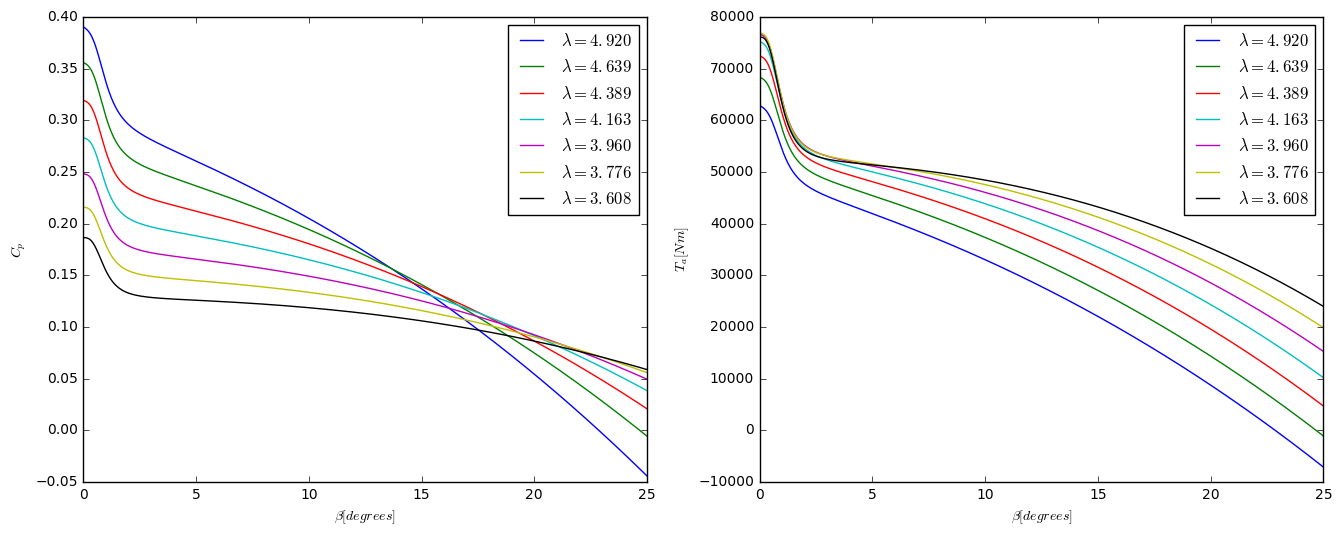

In [6]:
v = np.linspace(11,15,7)
rho = 1.29 # kg/m^3
ng = 80 # unitless
R = 21.65 # m
Kt = 9500 # N m s / rad
Jt = 3.25e5 # Kg m^2
wg = 200 # set point of generator speed
B = np.linspace(0,25,1e3)

lam = wg*R/v/ng

Cp = np.zeros((len(v),len(B)))
Ta = np.zeros((len(v),len(B)))

plt.figure(figsize=(16,6))
for i,j in enumerate(lam):
    lami = 1/((1/(j + 0.02*B)) - 0.03/(B**3 + 1))
    Cp[i,:] = 0.73*(151/lami-0.58*B-0.002*B**2.14-13.2)*np.exp(-18.4/lami)
    plt.subplot(1,2,1)
    plt.plot(B,Cp[i,:], label = r'$\lambda = {:.3f}$'.format(j))
    plt.xlabel(r'$\beta [degrees]$')
    plt.ylabel(r'$C_p$')
leg = plt.legend(loc = 1)
    
for i,j in enumerate(lam):
    lami = 1/((1/(j + 0.02*B)) - 0.03/(B**3 + 1))
    Cp[i,:] = 0.73*(151/lami-0.58*B-0.002*B**2.14-13.2)*np.exp(-18.4/lami)
    Ta[i,:] = 0.5*rho*R**3*v[i]**2*Cp[i,:]/j
    plt.subplot(1,2,2)
    plt.plot(B,Ta[i,:],label = r'$\lambda = {:.3f}$'.format(j))
    plt.xlabel(r'$\beta [degrees]$')
    plt.ylabel(r'$T_a [Nm]$')
    
leg = plt.legend(loc = 1)

It can be seen that the the power coefficient decreases with increasing tip speed ratio. Also, the power coefficient decreases with increasing $\beta$, which corresponds to a decreasing pitch angle. Thus, if the measured $\omega_g$ is above rated, $\beta$ should be increased in response (in order to decrease the power coefficient or the efficiency of the turbine). This is direct-acting control.

### Section 2: Velocity Form Nonlinear Control

A full analysis of the nonlinear system is performed using the canned integrator “odient”. Velocity form control is used to approximate the change in controller output for this system. The simulation is run for both step changes and random variations in the disturbance variable (wind speed).


#### 2.1 Set Parameters, Control Saturation, and Derivative Function

Parameters values and extrema are defined, and a function is created to calculate the modelling derivative shown above in Eq. [7]. Also, the delay of the motor response is initialized.

In [7]:
# set parameters

# do simulation at fixed time steps dt
ti = 0.0
tf = 30
dt = (tf-ti)/400
tgrid = np.linspace(ti,tf,int((tf-ti)/dt)+1)

# all system parameters found in references [3] and [4]
rho = 1.29 # kg/m^3
ng = 80 # unitless
R = 21.65 # m
Kt = 9500 # N m s / rad
Jt = 3.25e5 # Kg m^2
wgsp = 200 # set point of generator speed
tauM = .155 # seconds, from [7]


# control saturation
B_min = 0                          # minimum possible blade angle
B_max = 25                          # maximum possible blade angle
def sat(B):                          # function to return feasible value of blade angle
    return max(B_min,min(B_max,B))

# function to calculate necessary derivatives to pass into odeint
def deriv(MP,t):
    wg, B = MP
    dBdt = 1/tauM*(B_ - B) # introduce a delay in motor response
    dwgdt = ng/Jt*(0.5*rho*np.pi*R**3*(Cp/lam)*vv**2*(1-1/ng)-(Kt/ng*wg)) # Eq.[7]
    return dwgdt, dBdt

#### 2.2 Control of Step Changes in Velocity

The simulation is performed with step changes in wind velocity (the disturbance variable).

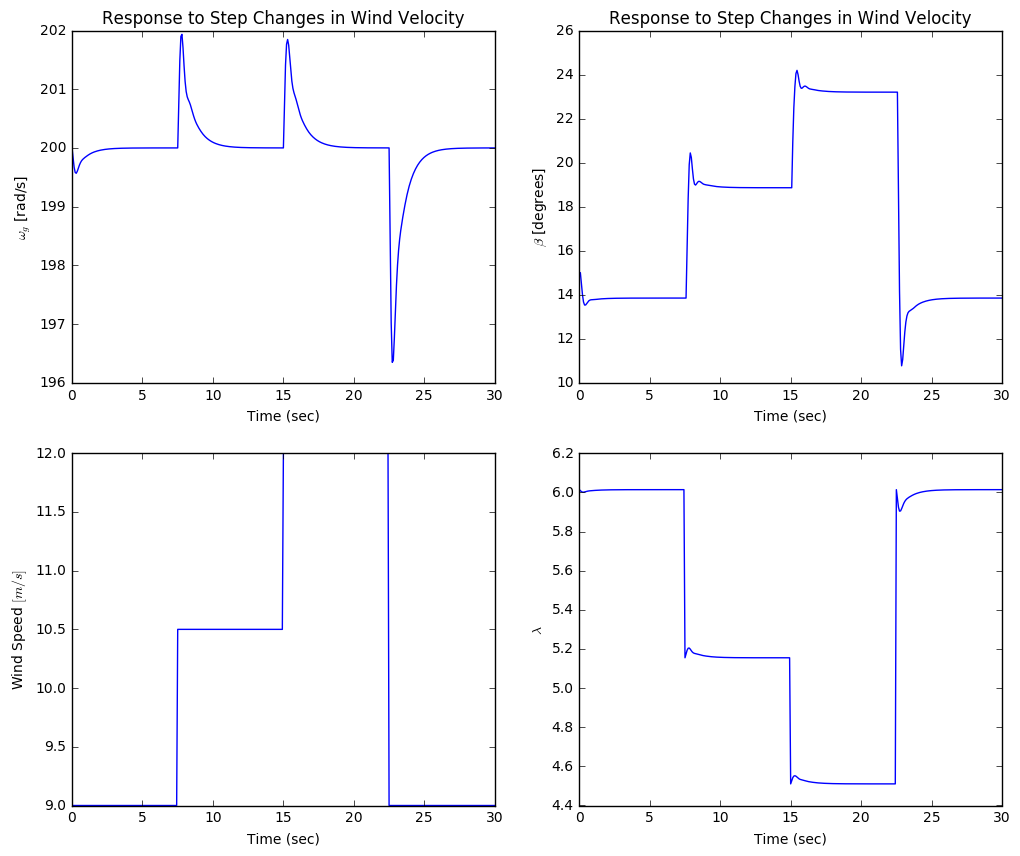

In [8]:
vvec = [9]*100+[10.5]*100+[12]*100+[9]*101 # 4 step changes

Kp = 7 # tuned below in section 2.4
Ki = 8 # tuned below in section 2.4

# create lists to log results
Blog = []
wglog = []
lamlog = []
cplog = []

# initialize error
eP_ = 0 # first value for the 'previous' error
bb = 1 # because the set point is not changing, there is no need to make
# the proportional error equal only to the current value of wg

# set initial conditions
B = 15
wg = 200

# solve
for i,t in enumerate(tgrid):
    vv = vvec[i]
    Blog.append(B)

    eP = bb*wgsp - wg # calculate 'current' value of proportional error
    eI = wgsp-wg # calculate 'current' value of integral error
    B_ = B - (Kp*(eP - eP_) + Ki*dt*eI) # desired B, which is not instantaneously
    # achieved due to motor response delay
    B_ = sat(B_) # make sure calculated B is feasible

    lam = wg*R/vv/ng
    lamlog.append(lam)
    lami = 1/((1/(lam + 0.02*(B))) - 0.03/((B)**3 + 1))
    Cp = 0.73*(151/lami-0.58*(B)-0.002*(B)**2.14-13.2)*np.exp(-18.4/lami)
    cplog.append(Cp)

    wglog.append(wg)
    wg, B = odeint(deriv,[wg,B],[t,t+dt])[-1] # calculate actual wg, B

    eP_ = eP # reset 'previous' error

# plot up
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(tgrid,wglog)
plt.xlabel('Time (sec)')
plt.ylabel(r'$\omega_g$ [rad/s]')
plt.title('Response to Step Changes in Wind Velocity')

plt.subplot(2,2,2)
plt.plot(tgrid,Blog)
plt.xlabel('Time (sec)')
plt.ylabel(r'$\beta$ [degrees]')
plt.title('Response to Step Changes in Wind Velocity')

plt.subplot(2,2,3)
plt.plot(tgrid,vvec)
plt.xlabel('Time (sec)')
plt.ylabel(r'Wind Speed $[m/s]$')

plt.subplot(2,2,4)
plt.plot(tgrid,lamlog)
plt.xlabel('Time (sec)')
plt.ylabel(r'$\lambda$')

These results show the system responds well to step changes in the disturbance variable. Most importantly, the speed of the generator remains near the setpoint. Also, the generator speed returns fairly quickly to the setpoint without much overshoot. The pitch angle also responds well to these changes, evidenced by a reasonably small overshoot in the response to a step change in disturbance.  Increasing wind speeds lead to increasing $\beta$, as expected. Tip speed ratio is also seen to have an inverse relationship with wind speed as given in Eq. [3].

#### 2.3 Control of Random Wind Velocity

The simulation is now performed with random variations in the wind velocity (the disturbance variable).

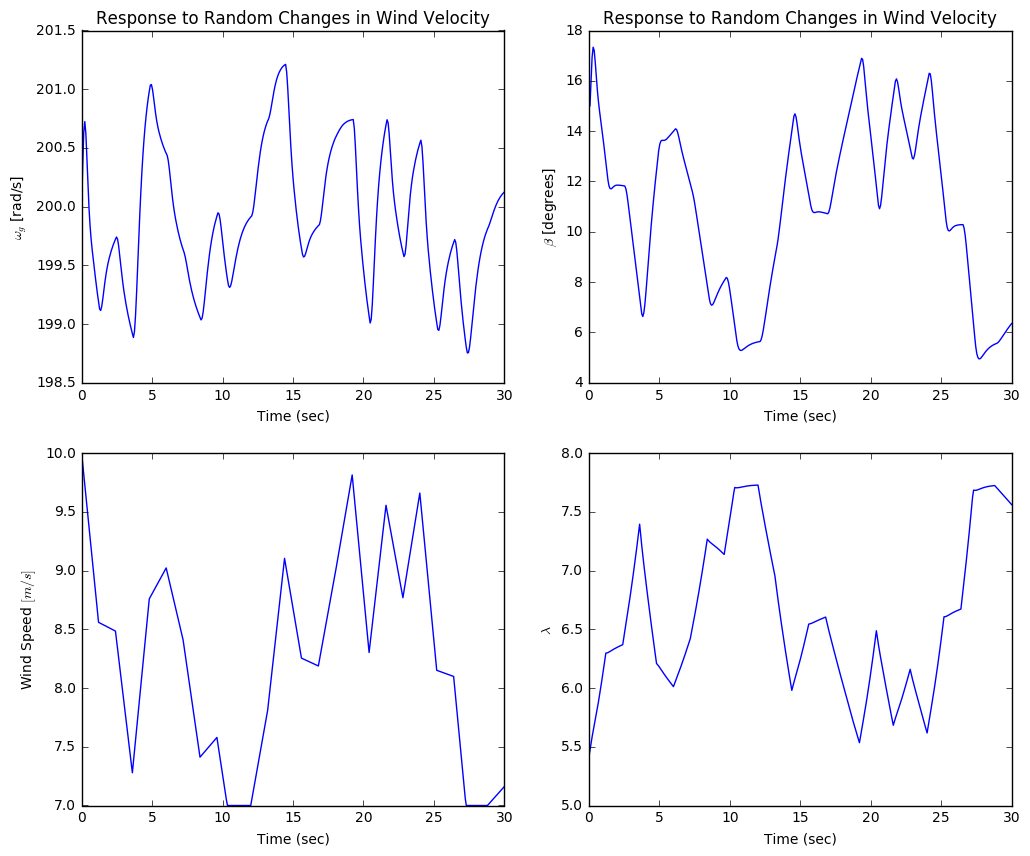

In [9]:
 # function to return feasible value of wind speed for region 3 operation
def satv(v):
    return max(v_min,min(v_max,v))

# control saturation
v_min = 7                          # minimum wind speed in region 3
v_max = 12.5                          # maximum wind speed in region 3

vvec = np.zeros(len(tgrid))
vvec[0] = 10
nn = 16

# simulates random wind speed changes
for i in np.arange(int((len(tgrid)-1)/nn)):
    jumpran = ran.uniform(-0.1,0.1)
    vvec[nn*i+1] = vvec[nn*i]+jumpran
    for j in np.arange(2,nn+1):
        vvec[nn*i+j] = vvec[nn*i+j-1]+jumpran
    for k in np.arange(nn+1):
        vvec[nn*i+k] = satv(vvec[nn*i+k])

Kp = 7 # tuned below in section 2.4
Ki = 8 # tuned below in section 2.4

# create lists to log results
Blog = []
wglog = []
lamlog = []
cplog = []

# initialize error
eP_ = 0 # first value for the 'previous' error
bb = 1 # because the set point is not changing, there is no need to make
# the proportional error equal only to the current value of wg

# set initial conditions
B = 15
wg = 200

# solve
for i,t in enumerate(tgrid):
    vv = vvec[i]
    Blog.append(B)

    eP = bb*wgsp - wg # calculate 'current' value of proportional error
    eI = wgsp-wg # calculate 'current' value of integral error
    B_ = B - (Kp*(eP - eP_) + Ki*dt*eI) # desired B, which is not instantaneously
    # achieved due to motor response delay
    B_ = sat(B_) # make sure calculated B is feasible

    lam = wg*R/vv/ng
    lamlog.append(lam)
    lami = 1/((1/(lam + 0.02*(B))) - 0.03/((B)**3 + 1))
    Cp = 0.73*(151/lami-0.58*(B)-0.002*(B)**2.14-13.2)*np.exp(-18.4/lami)
    cplog.append(Cp)

    wglog.append(wg)
    wg, B = odeint(deriv,[wg,B],[t,t+dt])[-1] # calculate actual wg, B

    eP_ = eP # reset 'previous' error

# plot up
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(tgrid,wglog)
plt.xlabel('Time (sec)')
plt.ylabel(r'$\omega_g$ [rad/s]')
plt.title('Response to Random Changes in Wind Velocity')

plt.subplot(2,2,2)
plt.plot(tgrid,Blog)
plt.xlabel('Time (sec)')
plt.ylabel(r'$\beta$ [degrees]')
plt.title('Response to Random Changes in Wind Velocity')

plt.subplot(2,2,3)
plt.plot(tgrid,vvec)
plt.xlabel('Time (sec)')
plt.ylabel(r'Wind Speed $[m/s]$')

plt.subplot(2,2,4)
plt.plot(tgrid,lamlog)
plt.xlabel('Time (sec)')
plt.ylabel(r'$\lambda$')

For these random wind speed changes, the model performs well with very small deviations from the desired generator speed. While the system never reaches a steady state during the process due to the continuous fluctuations in wind speed, the response is relatively quick and the generator speed remains close to the desired setpoint. This example shows how the turbine might respond in a more realistic setting.

#### 2.4 Model and Tune

The model was tuned below by a combination of the Ziegler-Nichols method and manual tuning. First, the integral control was set to 0 and the $K_p$ at which continuous cycling occurred was recorded as 15.5. Then, the tuned $K_p$ was chosen by the Ziegler-Nichols method as $15.5*.45 = 7.$ The $K_i$ was then gradually increased until the desired response was achieved; a tuned $K_i$ of 8 was chosen.

20.3717932398


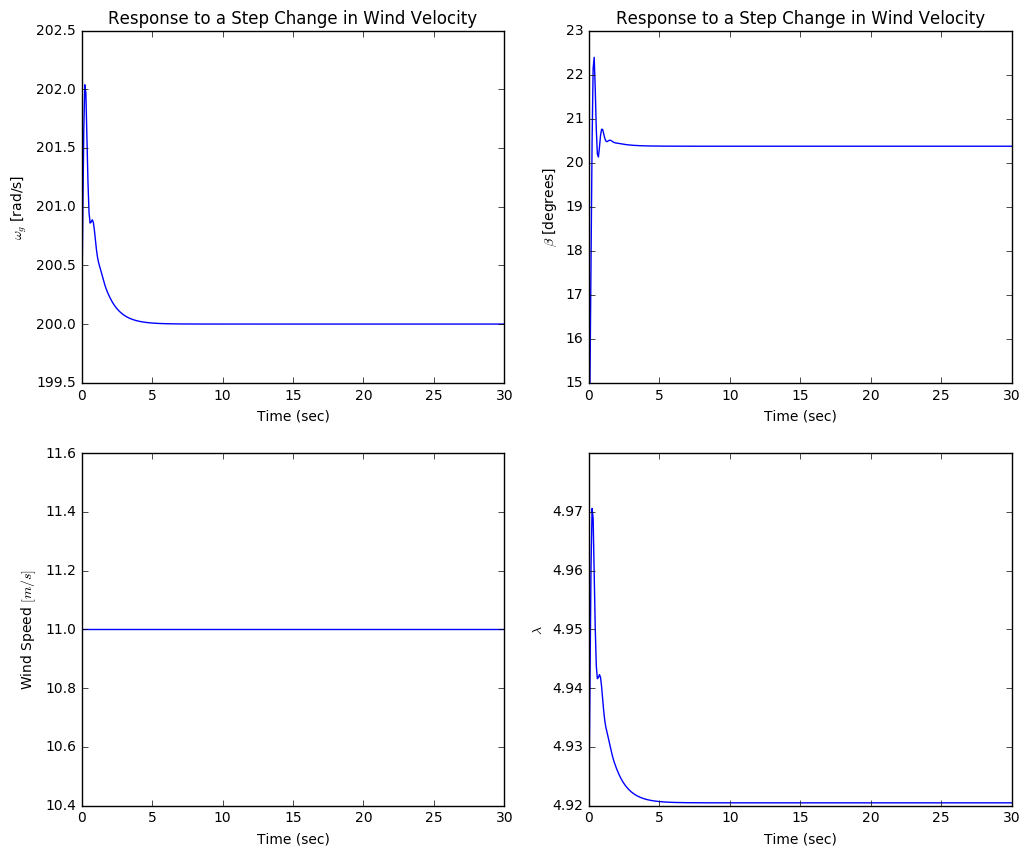

In [10]:
vvec = [11]*401 # single wind speed

def model1(Kp = 7.0, Ki = 8.0):

# function to calculate necessary derivatives to pass into odeint
    def deriv(MP,t):
        wg, B = MP
        dBdt = 1/tauM*(B_ - B) # introduce a delay in motor response
        dwgdt = ng/Jt*(0.5*rho*np.pi*R**3*(Cp/lam)*vv**2*(1-1/ng)-(Kt/ng*wg))
        return dwgdt, dBdt
    
    # create lists to log results
    Blog = []
    wglog = []
    lamlog = []
    cplog = []

    # initialize error
    eP_ = 0 # first value for the 'previous' error
    bb = 1 # because the set point is not changing, there is no need to make
    # the proportional error equal only to the current value of wg

    # set initial conditions
    B = 15
    wg = 200

    # solve
    for i,t in enumerate(tgrid):
        vv = vvec[i]
        Blog.append(B)

        eP = bb*wgsp - wg # calculate 'current' value of proportional error
        eI = wgsp-wg # calculate 'current' value of integral error
        B_ = B - (Kp*(eP - eP_) + Ki*dt*eI) # desired B, which is not instantaneously
        # achieved due to motor response delay
        B_ = sat(B_) # make sure calculated B is feasible

        lam = wg*R/vv/ng
        lamlog.append(lam)
        lami = 1/((1/(lam + 0.02*(B))) - 0.03/((B)**3 + 1))
        Cp = 0.73*(151/lami-0.58*(B)-0.002*(B)**2.14-13.2)*np.exp(-18.4/lami)
        cplog.append(Cp)

        wglog.append(wg)
        wg, B = odeint(deriv,[wg,B],[t,t+dt])[-1] # calculate actual wg, B

        eP_ = eP # reset 'previous' error

    # plot up
    plt.figure(figsize=(12,10))
    plt.subplot(2,2,1)
    plt.plot(tgrid,wglog)
    plt.xlabel('Time (sec)')
    plt.ylabel(r'$\omega_g$ [rad/s]')
    plt.title('Response to a Step Change in Wind Velocity')

    plt.subplot(2,2,2)
    plt.plot(tgrid,Blog)
    plt.xlabel('Time (sec)')
    plt.ylabel(r'$\beta$ [degrees]')
    plt.title('Response to a Step Change in Wind Velocity')

    plt.subplot(2,2,3)
    plt.plot(tgrid,vvec)
    plt.xlabel('Time (sec)')
    plt.ylabel(r'Wind Speed $[m/s]$')

    plt.subplot(2,2,4)
    plt.plot(tgrid,lamlog)
    plt.xlabel('Time (sec)')
    plt.ylabel(r'$\lambda$')
    
    print(Blog[-1])
interact(model1, Ki = (0.01,40,.05), Kp = (0.01,30,.1))

The tuned parameters were chosen to balance speed of response with limiting overly oscillatory behavior.

Overall, the full simulation that solves the nonlinear differential equations indicates that PI control was successful in regulating generator speed given disturbances in the wind speed.

### Section 3: Linear Control Model

The full nonlinear model, as shown in Eq. [7], is linearized by use of Taylor series approximation, as shown in Eq. [8].  The result is evaluated at nominal values and used to produce the necessary transfer functions.  Closed-loop transfer functions are then computed for the system, allowing for a full simulation with this linear approximation.

#### 3.1 Linearize and Determine $G_p, G_d$

The partial derivatives, according to Eq. [9], are determined analytically and evaluated at nominal values in order to derive the linear relation for $\frac{dw_g'}{dt}$ given below.

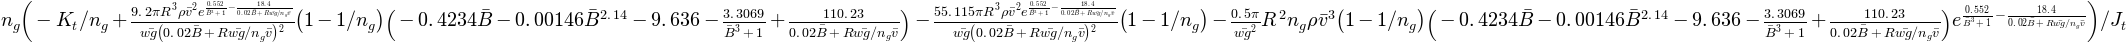

The linearized relation is:


"d(wg')/dt = "

In [11]:
rho,ng,R,wg,Jt,Kt,v,B,vbar,Bbar,wgbar = \
    sym.symbols('rho n_g R w_g J_t K_t v beta vbar Bbar wgbar', positive=True)
vdev,Bdev,wgdev = sym.symbols('vacute Bacute wgacute')

# set up function
lam = wg*R/v/ng
lami = 1/((1/(lam + 0.02*B)) - 0.03/(B**3 + 1))
Cp = 0.73*(151/lami-0.58*B-0.002*B**2.14-13.2)*sym.exp(-18.4/lami)
f = ng/Jt*(0.5*rho*sym.pi*R**3*(Cp/lam)*v**2*(1-1/ng)-(Kt/ng*wg))
# f is function to linearize; it is d(wg)/dt

# take partial derivatives and evaluate at nominal values
dfdwg = sym.diff(f,wg).subs([(v,vbar),(B,Bbar),(wg,wgbar)])
dfdv = sym.diff(f,v).subs([(v,vbar),(B,Bbar),(wg,wgbar)])
dfdB = sym.diff(f,B).subs([(v,vbar),(B,Bbar),(wg,wgbar)])

display(dfdwg)

# values of knowns and nominal values
Bbarv = 13.847 # degrees
vbarv = 9 # m/s
wgbarv = 200 # rad/s
rhov = 1.29 # kg/m^3
ngv = 80 # unitless
Rv = 21.65 # m
Ktv = 9500 # N m s / rad
Jtv = 3.25e5 # Kg m^2

# substitue in all knowns and nominal values
first = N(dfdwg.subs([(Bbar,Bbarv),(vbar,vbarv),(wgbar,wgbarv),(rho,rhov),(ng,ngv),
                 (R,Rv),(Kt,Ktv),(Jt,Jtv)]))
second = N(dfdB.subs([(Bbar,Bbarv),(vbar,vbarv),(wgbar,wgbarv),(rho,rhov),(ng,ngv),
                 (R,Rv),(Kt,Ktv),(Jt,Jtv)]))
third = N(dfdv.subs([(Bbar,Bbarv),(vbar,vbarv),(wgbar,wgbarv),(rho,rhov),(ng,ngv),
                 (R,Rv),(Kt,Ktv),(Jt,Jtv)]))

# sum together
summ = first*wgdev+second*Bdev+third*vdev

print('The linearized relation is:')
display('d(wg\')/dt = ',summ)

This result can be rewritten as:

$$\frac{dw_g'}{dt} = c1*w_g' + c2*B' + c3*v'$$

where c1, c2, and c3 are the constants in front of each of the deviation variables as calculated above.

Taking the Laplace Transform of both sides:

$$s*w_g'(s) = c1*w_g'(s) + c2*B'(s) + c3*v'(s)$$

Then rearranging:

$$s*w_g'(s) - c1*w_g'(s) = c2*B'(s) + c3*v'(s)$$

$$w_g'(s)(s - c1) = c2*B'(s) + c3*v'(s)$$

$$w_g'(s) = \frac{c2*B'(s) + c3*v'(s)}{(s - c1)}$$

$$w_g'(s) = \frac{c2}{s-c1}B'(s) + \frac{c3}{s-c1}v'(s)$$

Thus:

$ G_p = \frac{c2}{s-c1}$ and $ G_d = \frac{c3}{s-c1}$

#### 3.2 Set Up Transfer Functions

The rest of the transfer functions are here initialized from the parameters of the problem. $G_p$ and $G_d$ were found in the above section, while $G_c$ comes from the linearization of PI control. The values for $G_m$ and $G_{sp}$ are also inputted. Finally, the transfer function for the motor delay is accounted for in $G_{motor}$. The results are then displayed.

In [12]:
# transfer functions

# control constants
tauI = 3 # s, determined by tuning below
Kc = .5 # degrees / mA, determined by tuning below

# control transfer function
#Gc = control.tf([Kp,Ki],[1,0]) # unitless
Gc = Kc*(1+control.tf([1],[tauI,0]))
print('Gc = ', Gc)

# Constants
c1 = first # unitless
c2 = second # (rad/s)/deg 
c3 = third # (rad/s)/(m/s)

# model transfer functions
Gsp = (20-4)/(250-150) # mA/(rad/s)
Gm = (20-4)/(250-150) # mA/(rad/s)
Gmotor = (15-5)/(20-4)*control.tf([-.155,1],[.155,1]) # degrees/mA
Gp = control.tf([0,c2],[1,-c1]) # (rad/s)/deg 
Gd = control.tf([0,c3],[1,-c1]) # (rad/s)/(m/s)
print('Gm = ',Gm)
print('Gsp = ',Gsp)
print('Gmotor = ',Gmotor)
print('Gp = ',Gp)
print('Gd = ',Gd)

Gc =  
1.5 s + 0.5
-----------
    3 s

Gm =  0.16
Gsp =  0.16
Gmotor =  
-0.09688 s + 0.625
------------------
    0.155 s + 1

Gp =  
  -1.902
----------
s + 0.2794

Gd =  
  6.859
----------
s + 0.2794



#### 3.3 Closed-Loop Transfer Functions

The closed loop transfer functions from (1) response in $\omega_{g}$ to a setpoint change, (2) the response in $\beta$ to a setpoint change, (3) the response in $\omega_{g}$ to a change in wind speed, and (4) the response in $\beta$ to a change in wind speed were determined.  See Figure X above for the schematic of the control loop.

In [13]:
# closed-loop transfer functions

# control variable response to change in set point
wg_wgsp = (Gp*Gmotor*Gc*Gsp)/(1+Gp*Gmotor*Gc*Gm)

# manipulated variable response to change in set point
B_wgsp = (Gmotor*Gc*Gsp)/(1+Gmotor*Gc*Gm*Gp)

# control variable response to change in disturbance variable
wg_v = Gd/(1+Gp*Gmotor*Gc*Gm)

# manipulated variable response to change in disturbance variable
B_v = -Gmotor*Gc*Gm*Gd/(1+Gp*Gmotor*Gc*Gm)

print('The closed-loop transfer function model of \
response in wg to a setpoint change is:',wg_wgsp)
print('The closed-loop transfer function model of \
response in B to a setpoint change is:',B_wgsp)
print('The closed-loop transfer function model of \
response in wg to a change in v is:',wg_v)
print('The closed-loop transfer function model of \
response in B to a change in v is:',B_v)

The closed-loop transfer function model of response in wg to a setpoint change is: 
    0.02057 s^5 + 0.0126 s^4 - 0.8541 s^3 - 0.5245 s^2 - 0.07973 s
-----------------------------------------------------------------------
0.2162 s^6 + 2.931 s^5 + 10.59 s^4 + 4.393 s^3 + 0.1781 s^2 - 0.07973 s

The closed-loop transfer function model of response in B to a setpoint change is: 
-0.01081 s^5 - 0.006625 s^4 + 0.449 s^3 + 0.2757 s^2 + 0.04191 s
----------------------------------------------------------------
    0.2162 s^5 + 2.871 s^4 + 9.786 s^3 + 1.659 s^2 - 0.2853 s

The closed-loop transfer function model of response in wg to a change in v is: 
            3.189 s^3 + 21.47 s^2 + 5.749 s
-------------------------------------------------------
0.465 s^4 + 3.304 s^3 + 1.455 s^2 + 0.06349 s - 0.02658

The closed-loop transfer function model of response in B to a change in v is: 
      0.07415 s^5 + 0.04544 s^4 - 3.08 s^3 - 1.891 s^2 - 0.2875 s
----------------------------------------------

#### 3.4 Model and Tune Linearized Step Responses

The linearly approximated system shown with the above closed loop transfer functions is fully simulated and tuned below using the Ziegler-Nichols Method. The “control.step” function are used to introduce a step change in the setpoint and in the disturbance, and the results are displayed graphically.

<function __main__.model1>

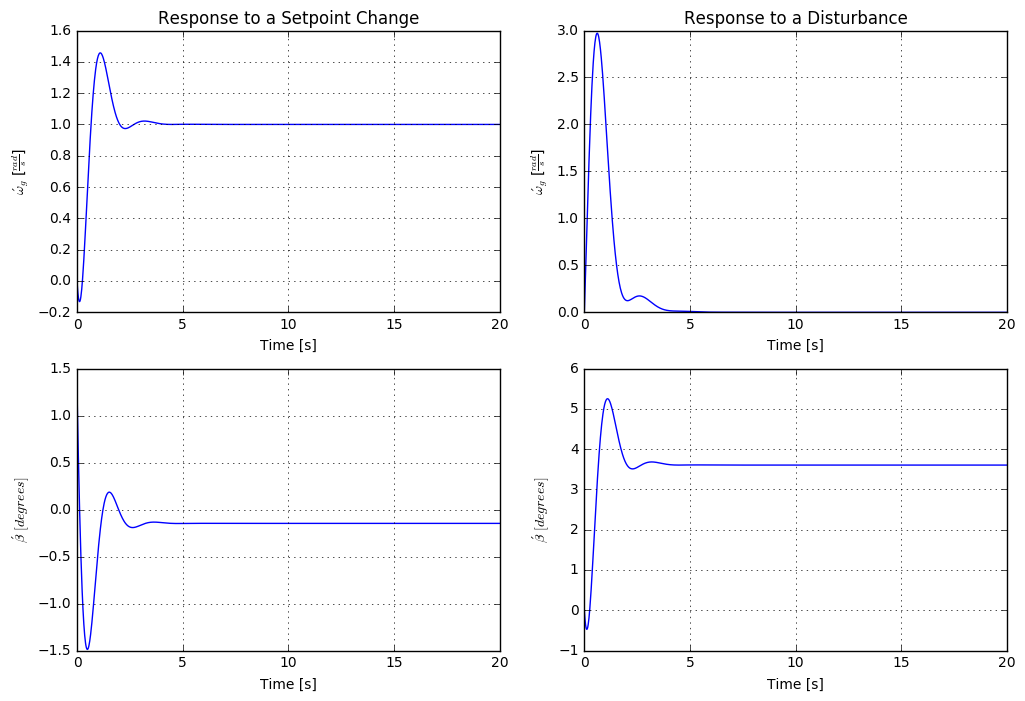

In [14]:
def model1(tauI = 1.1, Kc = -12.5): # set to tuned positions. Tuned by Ziegler-Nichols method.
    
    # transfer functions recalculated
    Gc = Kc*(1+control.tf([1],[tauI,0])) # unitless
    wg_wgsp = (Gp*Gmotor*Gc*Gsp)/(1+Gp*Gmotor*Gc*Gm)
    B_wgsp = (Gmotor*Gc*Gsp)/(1+Gmotor*Gc*Gm*Gp)
    wg_v = Gd/(1+Gp*Gmotor*Gc*Gm)
    B_v = -Gmotor*Gc*Gm*Gd/(1+Gp*Gmotor*Gc*Gm)
    
    # step responses
    t = np.linspace(0,20,1e3)
    plt.figure(figsize=(12,8))

    plt.subplot(2,2,1)
    wr,t = control.step(wg_wgsp,t) # wg response to change in setpoint
    plt.plot(t,wr)
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\acute \omega_g$ [$\frac{rad}{s}$]')
    plt.title('Response to a Setpoint Change')
    plt.grid()

    plt.subplot(2,2,2)
    wd,t = control.step(wg_v,t) # wg response to change in v (disturbance)
    plt.plot(t,wd)
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\acute \omega_g$ [$\frac{rad}{s}$]')
    plt.title('Response to a Disturbance')
    plt.grid()

    plt.subplot(2,2,3)
    Br,t = control.step(B_wgsp,t) # B response to change in setpoint
    plt.plot(t,Br)
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\acute \beta$ $[degrees]$')
    plt.grid()

    plt.subplot(2,2,4)
    Bd,t = control.step(B_v,t) # B response to change in v (disturbance)
    plt.plot(t,Bd)
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\acute \beta$ $[degrees]$')
    plt.grid()
    
interact(model1, tauI = (0.1,100,.1), Kc = (-40,0,.1))

##### Ziegler-Nichols Method

Using the Ziegler-Nichols tuning method, $P_u = 1$ at $K_{cu} = -35.3$.

Then, $\tau_I = 1/1.2 = .83$ and $K_c = 0.45*-35.3 = -15.9$

Fluctuations in $\beta$ were elimated by further tuning. It was determined that $\tau_I = 1.1$ and $Kc = -12.5$.

The tuned simulation responds as expected, with the response to a setpoint change leveling out at the deviation of the new setpoint quickly and with few oscillations. The system also responded well to a disturbance, which is more critical for this project due to frequent changes in wind speed, evidenced by a quick return to the nominal conditions with relatively few oscillations.

#### 3.5 Comparison of Linear and Nonlinear Control

The linear and nonlinear methods described above are now graphically compared. First, a small deviation in the steady state is introduced - an increase in wind speed from 9 m/s to 9.5 m/s. Then, a larger wind speed deviation, from 9 m/s to 12.5 m/s, is introduced.

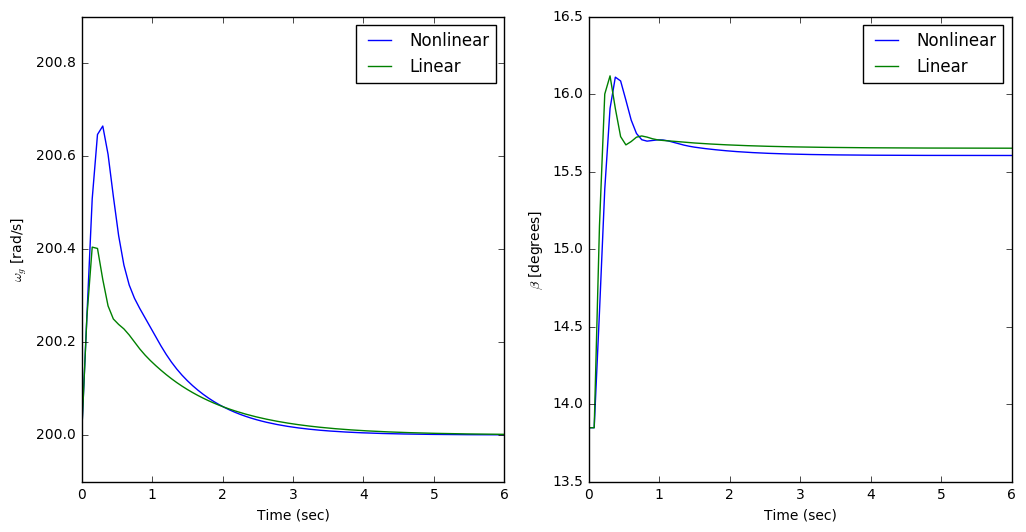

In [15]:
# Small wind speed deviation

# Linear Model

vvecdev = [0.5]*len(tgrid) # corresponds to actual velocity of 9.5 when added to vbar

tauI = 1.1 # tuned above
Kc = -12.5 # tuned above
tauM = .155 # found in reference

wgdevsp = 0 # set-point is no deviation from steady-state value of 200
e_ = 0.0 # initialize
wgdev = 0.0 # begin at steady state
Bdev = 0.0 # begin at steady state

Bdevlog = []
wgdevlog = []

def satBdev(Bdev):
    return max(Bdev_min,min(Bdev_max,Bdev))

# control saturation
Bdev_min = B_min-Bbarv # minimum Bdev
Bdev_max = B_max-Bbarv # maximum Bdev

def wgdot(P,t):
    wgdev,Bdev = P
    dBdevdt = 1/tauM*(Bdev_ - Bdev) # introduce a delay in motor response
    dwgdevdt = c1*wgdev+c2*Bdev+c3*vdev
    return dwgdevdt, dBdevdt


for i,t in enumerate(tgrid):
    vdev = vvecdev[i]
    Bdevlog.append(Bdev+Bbarv)
    wgdevlog.append(wgdev+wgbarv)
    e = wgdevsp - wgdev # 'current' error
    Bdev_ = Bdev + Kc*(e-e_ + dt*e/tauI) # desired controller response
    Bdev_ = satBdev(Bdev_) # saturation
    wgdev, Bdev = odeint(wgdot,[wgdev,Bdev],[t,t+dt])[-1]
    e_ = e # set 'previous' error before the calculation of the next error

# Nonlinear Model

vvec = [9.5]*401 # Matches disturbance velocity fed to linear model

Kp = 7 # tuned in section 2.4
Ki = 8 # tuned in section 2.4

# system parameters
rho = 1.29 # kg/m^3
ng = 80 # unitless
R = 21.65 # m
Kt = 9500 # N m s / rad
Jt = 3.25e5 # Kg m^2
wgsp = 200 # set point of generator speed
tauM = .155 # seconds

# create lists to log results
Blog = []
wglog = []
lamlog = []
cplog = []

# initialize error
eP_ = 0 # first value for the 'previous' error
bb = 1 # because the set point is not changing, there is no need to make
# the proportional error equal only to the current value of wg

# set initial conditions
B = 13.847
wg = 200

# solve
for i,t in enumerate(tgrid):
    vv = vvec[i]
    Blog.append(B)

    eP = bb*wgsp - wg # calculate 'current' value of proportional error
    eI = wgsp-wg # calculate 'current' value of integral error
    B_ = B - (Kp*(eP - eP_) + Ki*dt*eI) # desired B, which is not instantaneously
    # achieved due to motor response delay
    B_ = sat(B_) # make sure calculated B is feasible

    lam = wg*R/vv/ng
    lamlog.append(lam)
    lami = 1/((1/(lam + 0.02*(B))) - 0.03/((B)**3 + 1))
    Cp = 0.73*(151/lami-0.58*(B)-0.002*(B)**2.14-13.2)*np.exp(-18.4/lami)
    cplog.append(Cp)

    wglog.append(wg)
    wg, B = odeint(deriv,[wg,B],[t,t+dt])[-1] # calculate actual wg, B

    eP_ = eP # reset 'previous' error

# plot up
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(tgrid,wglog)
plt.plot(tgrid,wgdevlog)
plt.xlabel('Time (sec)')
plt.ylabel(r'$\omega_g$ [rad/s]')
plt.legend(['Nonlinear','Linear'])
plt.axis([0, 6, 199.9, 200.9])

plt.subplot(1,2,2)
plt.plot(tgrid,Blog)
plt.plot(tgrid,Bdevlog)
plt.xlabel('Time (sec)')
plt.ylabel(r'$\beta$ [degrees]')
plt.axis([0, 6, 13.5, 16.5])
plt.legend(['Nonlinear','Linear'])

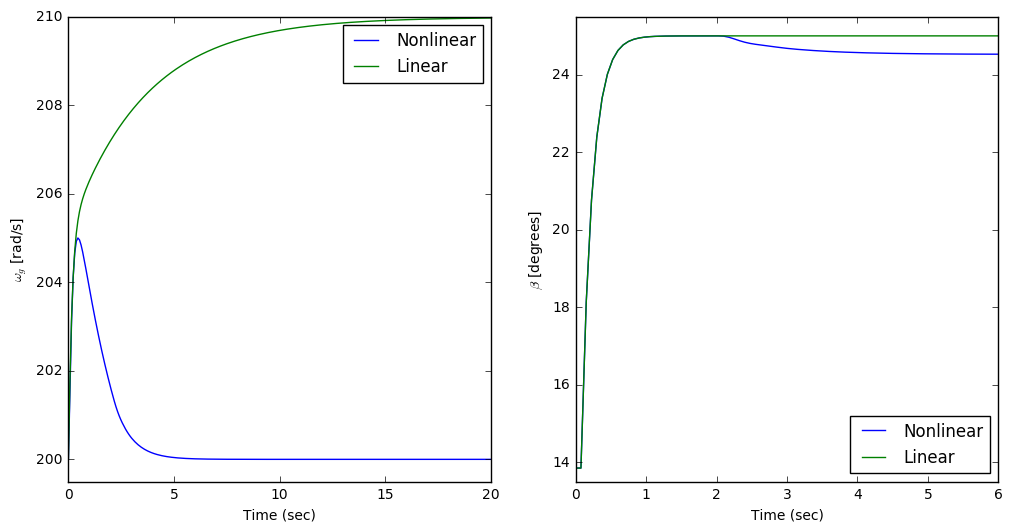

In [16]:
# Large wind speed deviation

# Linear Model

vvecdev = [3.5]*len(tgrid) # corresponds to actual velocity of 12.5 when added to vbar

tauI = 1.1 # tuned above
Kc = -12.5 # tuned above
tauM = .155 # found in reference

wgdevsp = 0 # set-point is no deviation from steady-state value of 200
e_ = 0.0 # initialize
wgdev = 0.0 # begin at steady state
Bdev = 0.0 # begin at steady state

Bdevlog = []
wgdevlog = []

def satBdev(Bdev):
    return max(Bdev_min,min(Bdev_max,Bdev))

# control saturation
Bdev_min = B_min-Bbarv # minimum Bdev
Bdev_max = B_max-Bbarv # maximum Bdev

def wgdot(P,t):
    wgdev,Bdev = P
    dBdevdt = 1/tauM*(Bdev_ - Bdev) # introduce a delay in motor response
    dwgdevdt = c1*wgdev+c2*Bdev+c3*vdev
    return dwgdevdt, dBdevdt


for i,t in enumerate(tgrid):
    vdev = vvecdev[i]
    Bdevlog.append(Bdev+Bbarv)
    wgdevlog.append(wgdev+wgbarv)
    e = wgdevsp - wgdev
    Bdev_ = Bdev + Kc*(e-e_ + dt*e/tauI)
    Bdev_ = satBdev(Bdev_)
    wgdev, Bdev = odeint(wgdot,[wgdev,Bdev],[t,t+dt])[-1]
    e_ = e

# Nonlinear Model

vvec = [12.5]*401 # Matches disturbance velocity fed to linear model

Kp = 7 # tuned in section 2.4
Ki = 8 # tuned in section 2.4

# system parameters
rho = 1.29 # kg/m^3
ng = 80 # unitless
R = 21.65 # m
Kt = 9500 # N m s / rad
Jt = 3.25e5 # Kg m^2
wgsp = 200 # set point of generator speed
tauM = .155 # seconds

# create lists to log results
Blog = []
wglog = []
lamlog = []
cplog = []

# initialize error
eP_ = 0 # first value for the 'previous' error
bb = 1 # because the set point is not changing, there is no need to make
# the proportional error equal only to the current value of wg

# set initial conditions
B = 13.847
wg = 200

# solve
for i,t in enumerate(tgrid):
    vv = vvec[i]
    Blog.append(B)

    eP = bb*wgsp - wg # calculate 'current' value of proportional error
    eI = wgsp-wg # calculate 'current' value of integral error
    B_ = B - (Kp*(eP - eP_) + Ki*dt*eI) # desired B, which is not instantaneously
    # achieved due to motor response delay
    B_ = sat(B_) # make sure calculated B is feasible

    lam = wg*R/vv/ng
    lamlog.append(lam)
    lami = 1/((1/(lam + 0.02*(B))) - 0.03/((B)**3 + 1))
    Cp = 0.73*(151/lami-0.58*(B)-0.002*(B)**2.14-13.2)*np.exp(-18.4/lami)
    cplog.append(Cp)

    wglog.append(wg)
    wg, B = odeint(deriv,[wg,B],[t,t+dt])[-1] # calculate actual wg, B

    eP_ = eP # reset 'previous' error

# plot up
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(tgrid,wglog)
plt.plot(tgrid,wgdevlog)
plt.xlabel('Time (sec)')
plt.ylabel(r'$\omega_g$ [rad/s]')
plt.legend(['Nonlinear','Linear'])
plt.axis([0, 20, 199.5, 210])

plt.subplot(1,2,2)
plt.plot(tgrid,Blog)
plt.plot(tgrid,Bdevlog)
plt.xlabel('Time (sec)')
plt.ylabel(r'$\beta$ [degrees]')
plt.axis([0, 6, 13.5, 25.5])
plt.legend(['Nonlinear','Linear'],loc=4)

Since the discrepancies between the nonlinear and linear simulations are on such a small order of magnitude in the first plot, the linear approximation can be deemed relatively successful for this model. In fact, it outperforms the nonlinear solution, keeping the generator speed closer to its set point. However, the differences in the two simulations at the larger deviation from steady-state show greater inaccuracies in the linear model. Gain scheduling would likely be required in order to maintain a workable linear control system for this model.

## V. Conclusions & Summary

First, the model used to simulate a wind turbine within region three was found to behave as expected, thereby implying the accuracy of the governing differential equations of the model. Increases in wind speed were always found to increase the generator speed, yet this could always be reduced back to the setpoint by increasing $\beta$ in order to decrease the aerodynamic efficiency of the turbine blades.

Second, PI control was proven to be a successful control scheme for maintaining safe generator speeds within region three, in agreement with the literature. When examined under both step changes in wind speed disturbance and approximations of plausible random wind fluctuations, the PI control method was found to adequately keep the control variable near the setpoint, both in a timely fashion and with relatively small oscillations.

As a further interesting result, a linear approximation of the system was found to be very accurate when compared to the nonlinear solution for small deviations from a linearized steady-state, despite the very nonlinear nature of the governing equations. However, for larger deviations from the linearized steady-state, the linear approximation fails. As a result, gain scheduling could be implemented to extend the scope of these results. This would require many steady-state systems to be linearized and the controller to switch between the different linear control solutions based on the conditions of the turbine. Such a system could be beneficial if it lead to reduced devations from the generator speed setpoint, as it did in section 3.5.

## VI. Appendix

### References

[1]  “Wind Turbine Power Output Variation with Steady Wind Speed.” *Wind Power Program*. www.wind-power-program.com/turbine_characteristics.htm. 02 May 2017.


[2] Aho, Jacob, Andrew Buckspan, Jason Laks, Yunho Jeong, Fiona Dunne, Lucy Pao, Paul Fleming, Matt Churchfield, and Kathryn Johnson. “Tutorial of Wind Turbine Control for Supporting Grid Frequency through Active Power Control.” 2012 American Control Conference: pg. 4. National Renewable Energy Laboratory. 27 June 2012.

[3] Vidal, Yolanda, Leonardo Acho, Ningsu Luo, Mauricio Zapateiro, and Francesc Pozo. “Power Control Design for Variable-Speed Wind Turbines.” *Energies* (2012): pg. 3033-3050.

[4] Rajendran, Saravanakumar and Debashisha Jena. “Control of Variable Speed Variable Pitch Wind Turbine at Above and Below Rated Wind Speed.” *Journal of Wind Energy*. Hindawi Publishing Corporation, 2014.

[5] Shamshirband, Shahaboddin, Dalibor Petkovic, Hadi Saboohi, Nor Badrul Anuar, Irum Inayat, Shatirah Akib, Zarko Cojbasic, Vlastimir Nikolic, Miss Laiha Mat Kiah, Abdullah Gani. “Wind turbine power coefficient estimation by soft computing methodologies: Comparative study.” *Energy Conversion and Management* 81 (2014): 520-526.

[6] Hwas, Abdulhamed and Reza Katebi. “Wind Turbine Control Using PI Pitch Angle Controller.” IFAC Conference on Advances in PID Control (2012). 28 March 2012.

[7] Ramakrishnan, V., S.K. Srivatsa. “Pitch Control of Wind Turbine Generator by using New Mechanism.” *J. Electrical Systems*: pg. 8.

**Special thanks to J.C. Kantor Github repository for Python notebook examples of linear and nonlinear control.**